# Predict Student Performance

In this notebook, I will be performing some data analysis and attempt to predict student performance using some basic feature engineering as well as some machine learning algorithms. 

The dataset for this project was grabbed from the [UCI database](https://archive.ics.uci.edu/dataset/320/student+performance) and cited below in the citation section.

For the different features that will be analyzed, as well as additional information will be within the student.txt file in the student folder.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.option_context('mode.use_inf_as_na', True)

%matplotlib inline

# Grabbing the Data

For the purposes of my analysis (and because this is my first personal ml project 👍), I will be reducing the amount of features that I will be working with as well as only analyzing the data within the student-mat.csv file.

In [2]:
data = pd.read_csv("student/student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Some information about the data

There are a total of 30 different features that can be used to predict the performance of the students. The performance will be evaluated by three different "grades": G1, G2, and G3 which correspond to the 1st period grade, 2nd period grade, and the final grade respectively. For now, I will just analyze the final grade G3. There's a mix of both categorical as well as numeric data, so for now I will just drop the categorical fields and select a couple of the numerical fields for simplicity. Note: I can hot encode some of the fields, such as sex, school, romantic, etc.. by using pd.get_dummies in order glean more info from the data.

In [8]:
df = data[["Medu", "Fedu", "studytime", "failures", "health", "absences", "G3"]]
df.head()

,Medu,Fedu,studytime,failures,health,absences,G3
0,4,4,2,0,3,6,6
1,1,1,2,0,3,4,6
2,1,1,2,3,3,10,10
3,4,2,3,0,5,2,15
4,3,3,2,0,5,4,10


# Data Exploration

Next we'll explore the data a bit.

<Axes: xlabel='Medu', ylabel='count'>

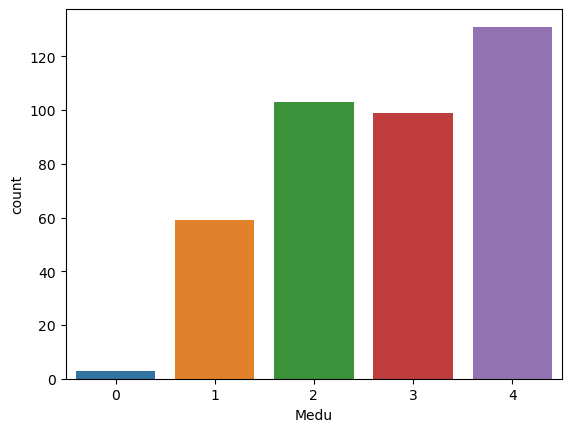

In [30]:
sns.countplot(data=df, x="Medu")

<Axes: xlabel='Medu', ylabel='G3'>

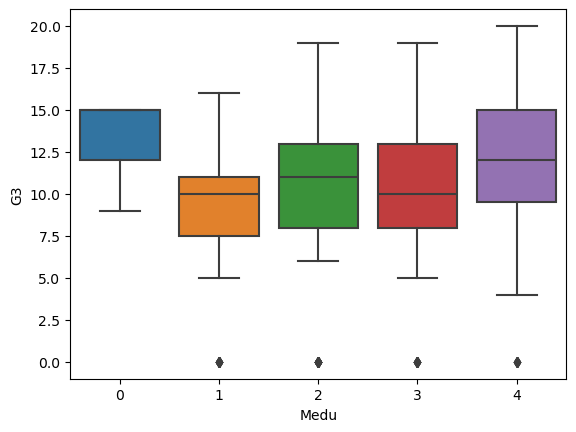

In [27]:
sns.boxplot(data=df, x="Medu", y="G3")

<Axes: xlabel='Fedu', ylabel='count'>

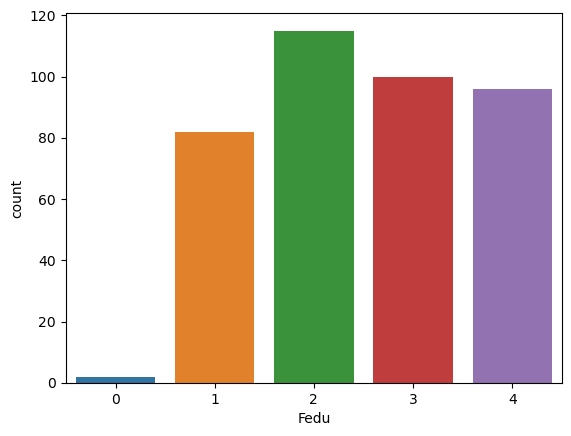

In [31]:
sns.countplot(data=df, x="Fedu")

<Axes: xlabel='Fedu', ylabel='G3'>

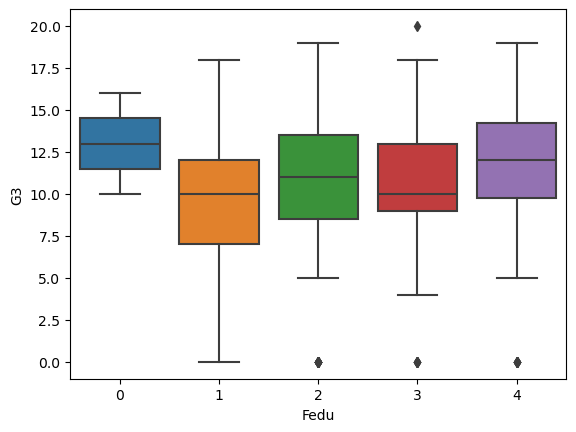

In [28]:
sns.boxplot(data=df, x="Fedu", y="G3")

# Medu and Fedu initial conclusions
An initial look at the education levels of both mother's and father's seems to show the slight trend that as the education levels of the parents go up, so do the final scores acheived by the students. Note that in both the Medu and the Fedu boxplots that the parent education level 0 was actually the highest, but does appears to be due to the low amount of available data.

# Citation

Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.